In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv('Luke_hair_loss_documentation.csv')
df

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/1/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,3.0,NaN,1
1,2/1/2021,Few,0,Low,0,3,NaN,Low,Pantene,No,N,1.0,NaN,1
2,3/1/2021,Medium,3,Low,1,0,NaN,Low,Pantene,Yes,Y,2.0,NaN,2
3,4/1/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,N,3.0,NaN,3
4,5/1/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,1.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,31/01/2022,Medium,1,Low,1,2,NaN,Low,Hair & Shoulder,No,N,1.0,NaN,5
396,1/2/2022,Few,1,Low,0,3,NaN,Low,Hair & Shoulder,Yes,Y,2.0,NaN,1
397,2/2/2022,Medium,1,Low,1,1,NaN,Low,Hair & Shoulder,No,N,2.0,NaN,5
398,3/2/2022,Medium,0,Low,1,1,NaN,Low,Hair & Shoulder,No,N,2.0,NaN,5


In [3]:
df
df.columns

Index(['date ', 'hair_loss', 'stay_up_late', 'pressure_level',
       'coffee_consumed', 'brain_working_duration', 'school_assesssment',
       'stress_level', 'shampoo_brand', 'swimming', 'hair_washing',
       'hair_grease', 'dandruff', 'libido'],
      dtype='object')

In [4]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   hair_loss               400 non-null    object 
 2   stay_up_late            400 non-null    int64  
 3   pressure_level          400 non-null    object 
 4   coffee_consumed         400 non-null    int64  
 5   brain_working_duration  400 non-null    int64  
 6   school_assesssment      95 non-null     object 
 7   stress_level            400 non-null    object 
 8   shampoo_brand           400 non-null    object 
 9   swimming                400 non-null    object 
 10  hair_washing            400 non-null    object 
 11  hair_grease             396 non-null    float64
 12  dandruff                111 non-null    object 
 13  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory 

,count,mean,std,min,25%,50%,75%,max
stay_up_late,400.0,1.910000,1.611954,0.0,1.0,2.0,3.0,8.0
coffee_consumed,400.0,1.162500,1.978859,0.0,0.0,0.0,1.0,10.0
brain_working_duration,400.0,3.970000,4.215272,0.0,1.0,2.0,7.0,18.0
hair_grease,396.0,2.565657,1.276162,1.0,2.0,2.0,4.0,5.0
libido,400.0,2.787500,1.822264,0.0,1.0,3.0,5.0,5.0


In [5]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'date ': ['1/1/2021' '2/1/2021' '3/1/2021' '4/1/2021' '5/1/2021' '6/1/2021'
 '7/1/2021' '8/1/2021' '9/1/2021' '10/1/2021' '11/1/2021' '12/1/2021'
 '13/01/2021' '14/01/2021' '15/01/2021' '16/01/2021' '17/01/2021'
 '18/01/2021' '19/01/2021' '20/01/2021' '21/01/2021' '22/01/2021'
 '23/01/2021' '24/01/2021' '25/01/2021' '26/01/2021' '27/01/2021'
 '28/01/2021' '29/01/2021' '30/01/2021' '31/01/2021' '1/2/2021' '2/2/2021'
 '3/2/2021' '4/2/2021' '5/2/2021' '6/2/2021' '7/2/2021' '8/2/2021'
 '9/2/2021' '10/2/2021' '11/2/2021' '12/2/2021' '13/02/2021' '14/02/2021'
 '15/02/2021' '16/02/2021' '17/02/2021' '18/02/2021' '19/02/2021'
 '20/02/2021' '21/02/2021' '22/02/2021' '23/02/2021' '24/02/2021'
 '25/02/2021' '26/02/2021' '27/02/2021' '28/02/2021' '1/3/2021' '2/3/2021'
 '3/3/2021' '4/3/2021' '5/3/2021' '6/3/2021' '7/3/2021' '8/3/2021'
 '9/3/2021' '10/3/2021' '11/3/2021' '12/3/2021' '13/03/2021' '14/03/2021'
 '15/03/2021' '16/03/2021' '17/03/2021' '18/03/2021' '19/03/2021'
 '

In [6]:
df['hair_loss'] = df['hair_loss'].replace({'Few': 1, 'Medium': 2, 'Many': 3, 'A lot': 4})
df['stress_level'] = df['stress_level'].replace({'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4})
df['shampoo_brand'] = df['shampoo_brand'].replace({'Pantene': 1, 'Hair & Shoulder': 2})
df['swimming'] = df['swimming'].replace({'No': 0, 'Yes': 1})
df['hair_washing'] = df['hair_washing'].replace({'Y': 1, 'N': 0})
df['dandruff'] = df['dandruff'].replace({'Many': 1, 'Few': 0})
                                                                                                  

del df['school_assesssment'] #Removing 'school_assesssment' column
df = df.iloc[:, 1:] #Removing 'Date' column

df.replace('nan', np.NaN, inplace=True)
df['dandruff'] = pd.to_numeric(df['dandruff'])
df['hair_grease'] = pd.to_numeric(df['hair_grease'])

mean = df['dandruff'].mean()
df['dandruff'].fillna(mean, inplace=True)

mean = df['hair_grease'].mean()
df['hair_grease'].fillna(mean, inplace=True)

for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'hair_loss': [1 2 3 4]
Unique values in column 'stay_up_late': [2 0 3 1 4 5 6 8]
Unique values in column 'pressure_level': ['Low' 'Medium' 'High' 'Very High']
Unique values in column 'coffee_consumed': [ 0  1  2  3  4  5  6  7  8  9 10]
Unique values in column 'brain_working_duration': [ 1  3  0  2  6  7  5  8  9 10 12 13 16 18 11]
Unique values in column 'stress_level': [1 2 3 4]
Unique values in column 'shampoo_brand': [1 2]
Unique values in column 'swimming': [0 1]
Unique values in column 'hair_washing': [1 0]
Unique values in column 'hair_grease': [3.         1.         2.         4.         5.         2.56565657]
Unique values in column 'dandruff': [0.31531532 0.         1.        ]
Unique values in column 'libido': [1 2 3 4 5 0]


In [7]:
df['pressure_level'] = df['pressure_level'].replace({'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3})
df.sample(40)

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
87,2,2,0,0,6,1,2,0,1,3.0,0.315315,1
69,2,1,0,1,1,1,2,1,1,2.0,0.315315,5
296,2,4,0,2,10,2,1,0,1,4.0,0.000000,1
281,2,2,0,1,5,1,1,0,0,2.0,0.315315,5
105,3,0,2,5,12,4,2,0,1,5.0,1.000000,5
130,1,1,0,0,3,1,2,0,0,1.0,0.315315,3
311,3,4,2,4,7,3,2,0,0,4.0,0.000000,4
278,1,1,0,0,2,1,1,0,0,2.0,0.315315,3
385,1,0,0,0,2,1,2,1,1,2.0,0.315315,2
70,2,2,0,1,5,1,2,0,0,2.0,0.315315,5


In [8]:
# pip install albumentations

In [9]:
# import albumentations as A

# df =  np.array([df])
# transform = A.Compose([
#     A.HorizontalFlip(p=0.5)
# ])

# X_train_augmented = transform(image=df)
# X_train_augmented

<Axes: >

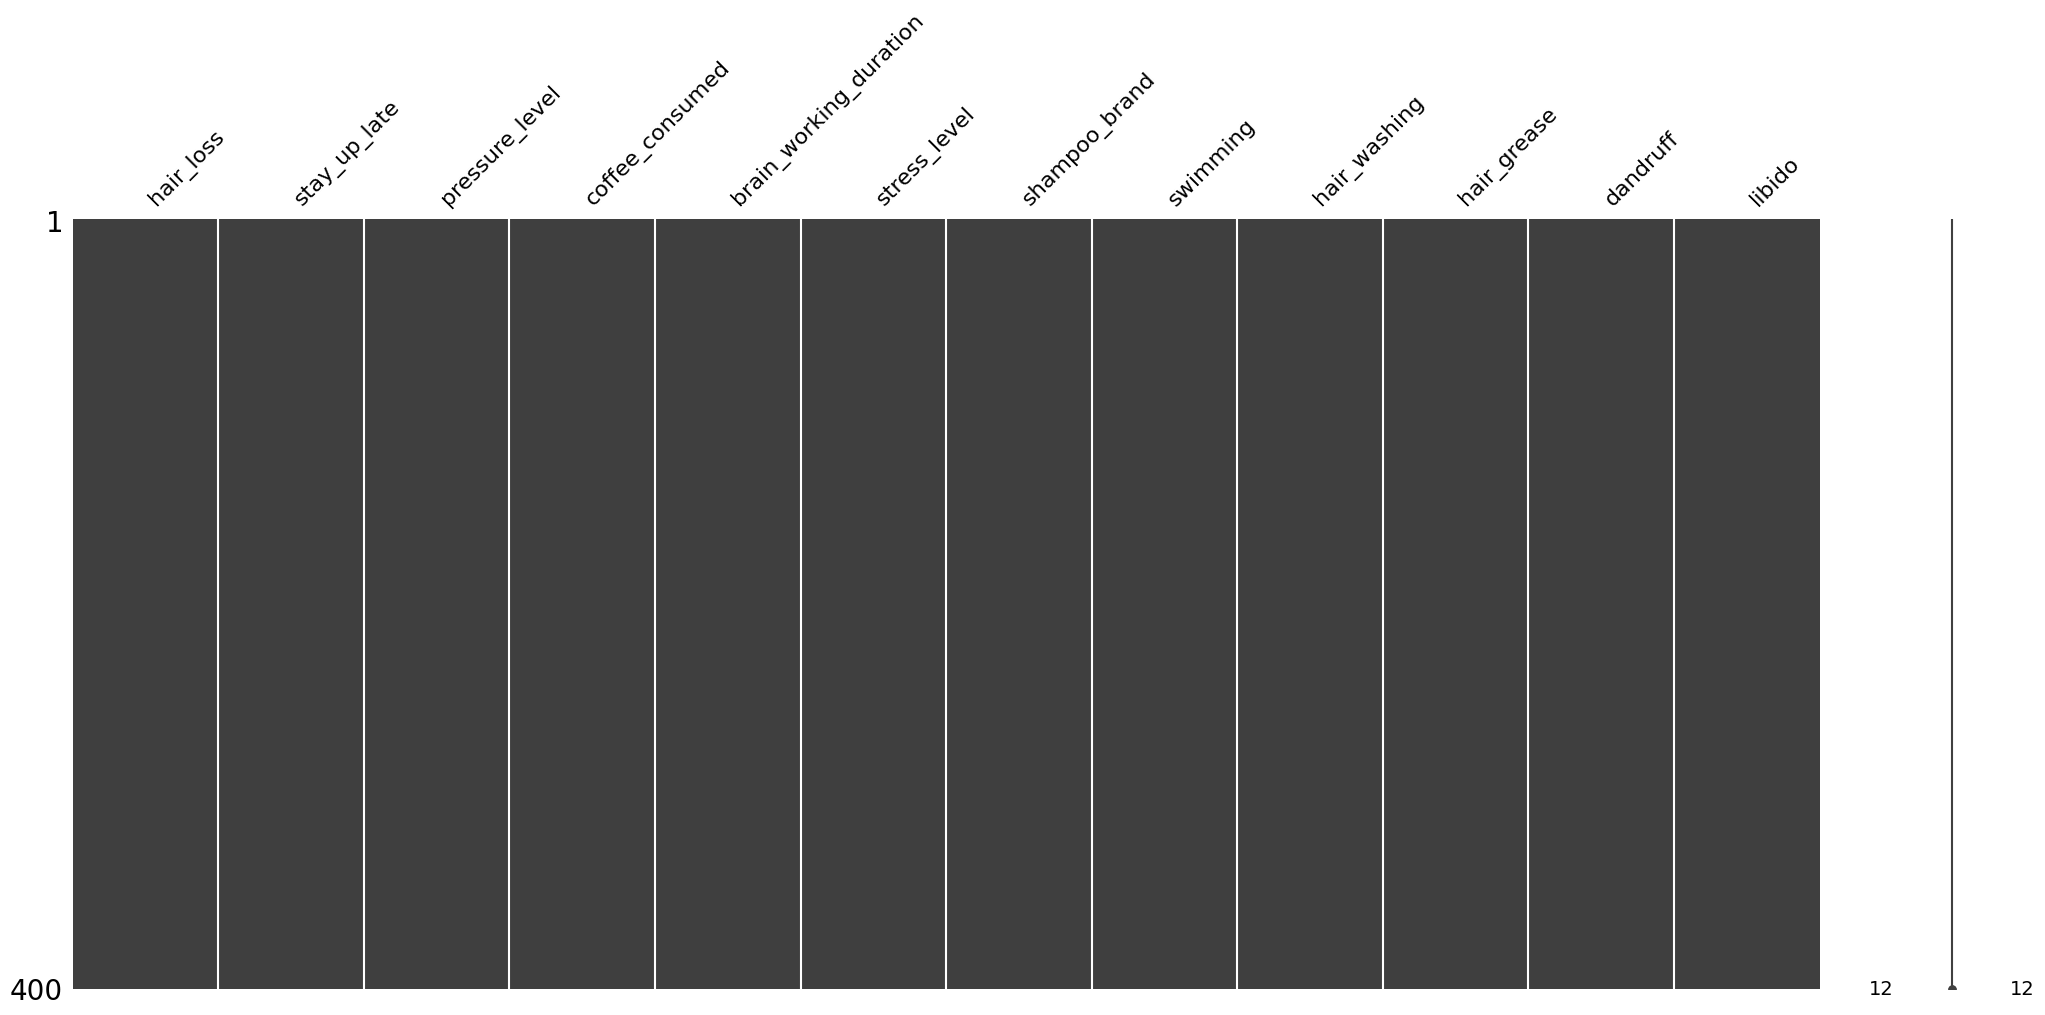

In [10]:
msno.matrix(df)

                        hair_loss
hair_loss                1.000000
stay_up_late             0.415415
pressure_level           0.720479
coffee_consumed          0.678935
brain_working_duration   0.577692
stress_level             0.736272
shampoo_brand            0.266491
swimming                -0.188286
hair_washing             0.063405
hair_grease              0.672344
dandruff                 0.313662
libido                   0.350831


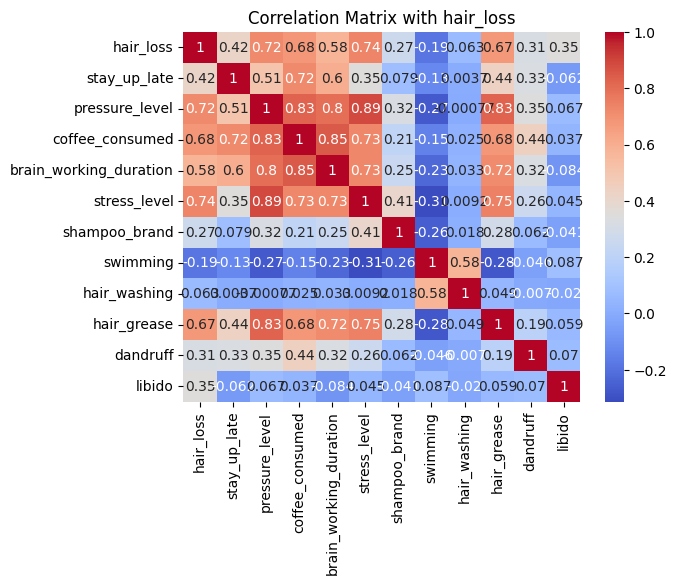

In [11]:
chosen_column = "hair_loss" 

corr_matrix = df.corr(method='pearson')


print(corr_matrix[[chosen_column]])  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix with {chosen_column}")
plt.show() 

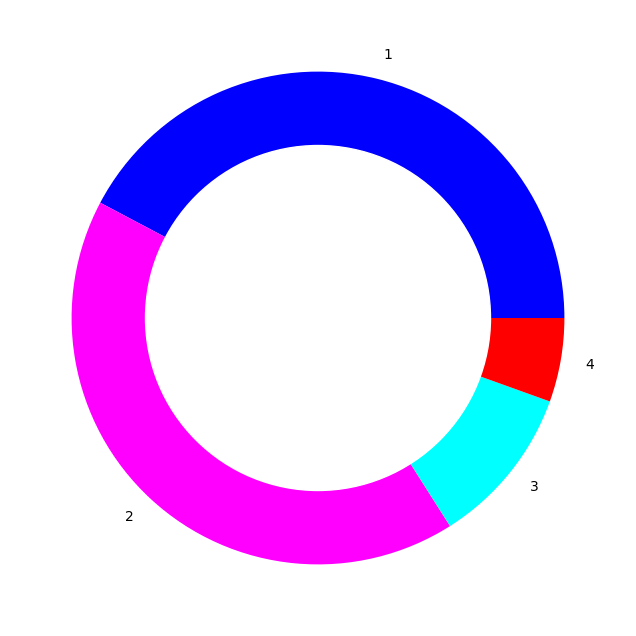

In [12]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.hair_loss.value_counts(), labels=['1', '2', '3', '4'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red'])
p = plt.gcf()
p.gca().add_artist(circle)

In [13]:
# as there are 7 classes, so there will be 7 different dataframes
data_1 = df[df['hair_loss'] == 1]
data_2 = df[df['hair_loss'] == 2]
data_3 = df[df['hair_loss'] == 3]
data_4 = df[df['hair_loss'] == 4]
data_2

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
2,2,3,0,1,0,1,1,1,1,2.0,0.315315,2
6,2,3,0,1,1,1,1,1,1,2.0,0.315315,3
9,2,1,0,1,2,1,1,1,1,1.0,0.315315,5
10,2,0,0,1,2,1,1,0,0,2.0,0.315315,5
11,2,2,0,1,1,1,1,0,0,2.0,0.315315,5
...,...,...,...,...,...,...,...,...,...,...,...,...
393,2,1,0,1,0,1,2,1,1,1.0,0.315315,5
394,2,2,0,1,2,1,2,0,0,2.0,0.315315,5
395,2,1,0,1,2,1,2,0,0,1.0,0.315315,5
397,2,1,0,1,1,1,2,0,0,2.0,0.315315,5


In [14]:
df.shape

(400, 12)

In [15]:
400 / 4

100.0

In [16]:
# applying resampling through sampling function in sklearn
from sklearn.utils import resample

# we will put 200 samples in each class
data_1_resample = resample(data_1, n_samples=200, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=200, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=200, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=200, 
                           random_state=123, replace=True)



df = pd.concat([data_1_resample, data_2_resample, data_3_resample, data_4_resample])


df.sample(3)

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
373,1,1,0,0,1,1,2,0,0,2.0,0.315315,3
154,1,2,0,0,2,2,2,0,0,1.0,0.315315,1
318,4,4,3,6,13,4,2,0,1,5.0,1.000000,3


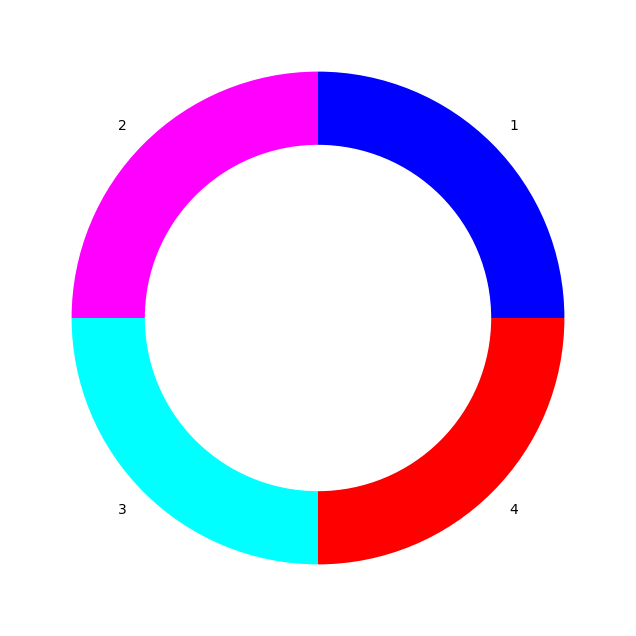

In [17]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.hair_loss.value_counts(), labels=['1', '2', '3', '4'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red'])
p = plt.gcf()
p.gca().add_artist(circle)

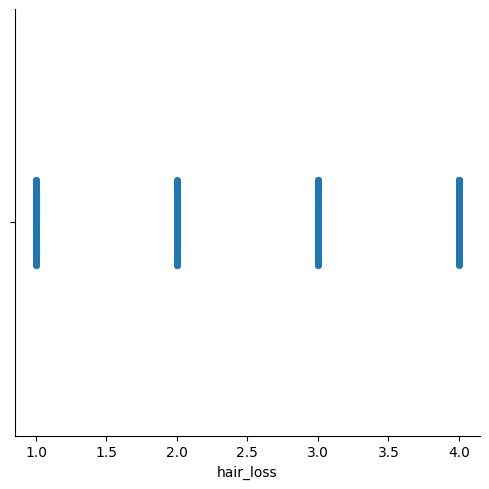

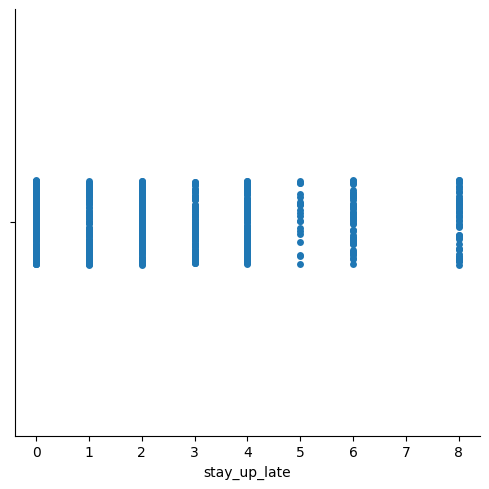

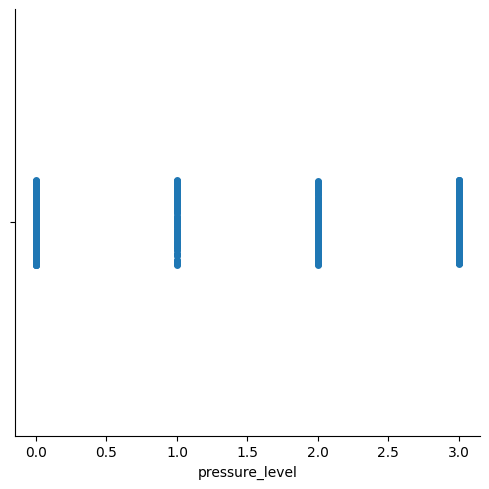

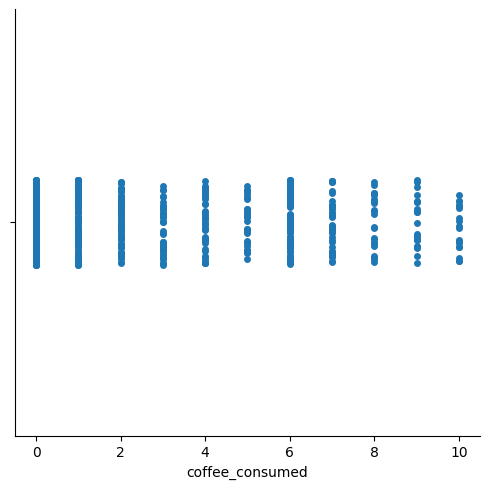

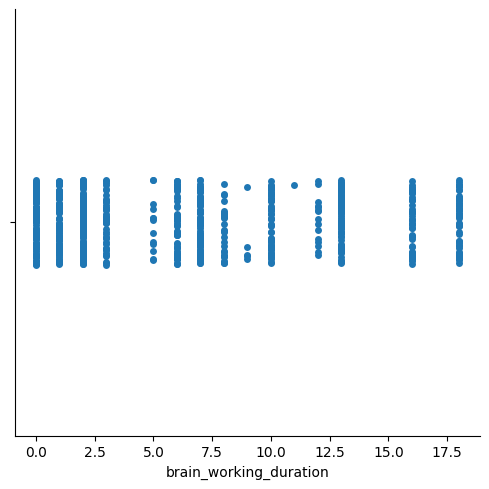

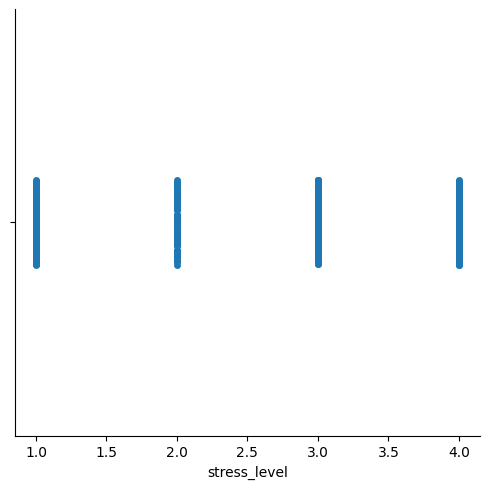

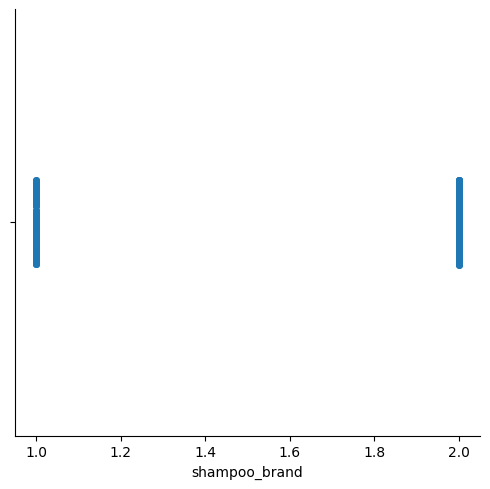

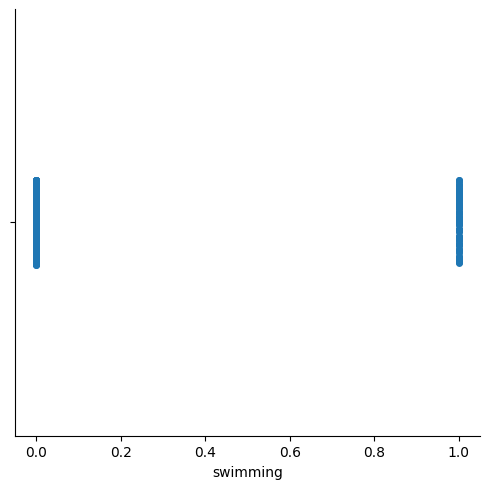

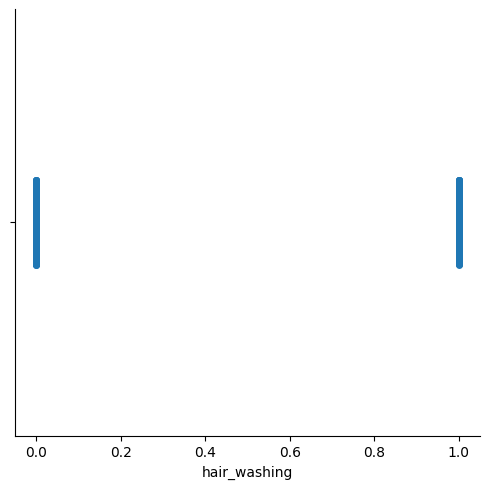

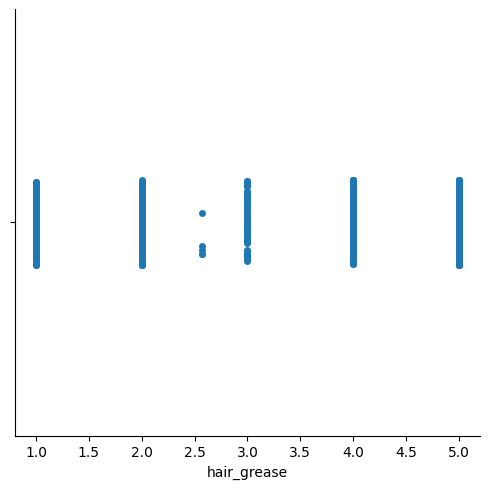

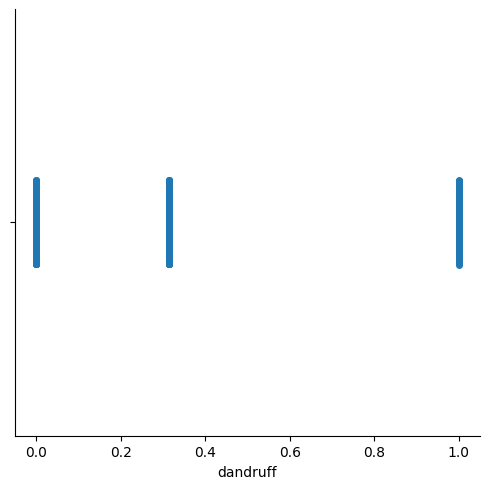

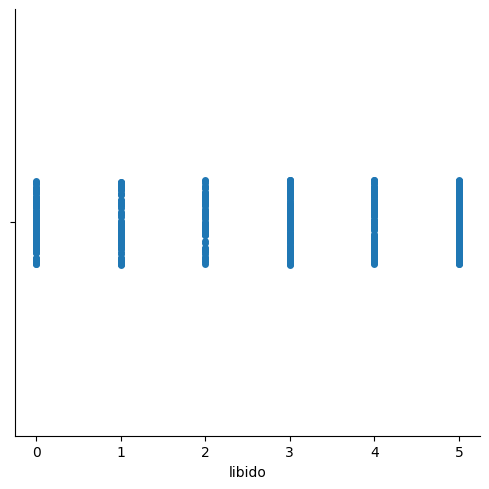

In [18]:
for col in df.columns:
    sns.catplot(x = col, data = df)

In [19]:
# del df['pressure_level'] #Removing 'pressure_level' column

In [20]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [21]:
X

X = (X - X.min()) / (X.max() - X.min())
X.sample(40)

,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
215,0.375,1.000000,0.6,0.722222,1.000000,1.0,0.0,0.0,1.00,1.000000,1.0
260,0.375,0.000000,0.0,0.000000,0.333333,1.0,0.0,1.0,0.25,0.315315,1.0
199,0.375,0.333333,0.0,0.055556,0.000000,1.0,0.0,0.0,0.50,0.315315,0.4
101,0.625,0.666667,0.3,0.388889,0.666667,1.0,0.0,1.0,0.75,0.000000,1.0
214,0.000,0.666667,0.5,0.666667,1.000000,1.0,0.0,1.0,1.00,1.000000,1.0
207,0.250,0.666667,0.4,0.388889,0.666667,1.0,0.0,0.0,0.75,0.000000,0.0
109,0.750,1.000000,0.7,0.888889,1.000000,1.0,0.0,1.0,1.00,1.000000,1.0
153,0.375,0.000000,0.0,0.111111,0.333333,1.0,0.0,1.0,0.25,0.315315,0.2
109,0.750,1.000000,0.7,0.888889,1.000000,1.0,0.0,1.0,1.00,1.000000,1.0
77,0.375,0.000000,0.1,0.277778,0.000000,1.0,0.0,0.0,0.25,0.315315,0.4


In [22]:
y.head(20)

257    1
289    1
151    1
241    1
25     1
176    1
254    1
285    1
138    1
239    1
270    1
289    1
89     1
160    1
60     1
268    1
369    1
176    1
171    1
388    1
Name: hair_loss, dtype: int64

In [23]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='auto', random_state=11)

# X_resampled, y_resampled = smote.fit_resample(X, y)

# resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='hair_loss')], axis=1)


In [24]:


# for col in df.columns:
#     print(f"Unique values in column '{col}': {df[col].unique()}")
# print("---")
# for col in resampled_data.columns:
#     print(f"Unique values in column '{col}': {resampled_data[col].unique()}")
    
# resampled_data

In [25]:
# plt.figure(figsize=(10, 8))
# circle = plt.Circle((0, 0), 0.7, color='white')
# plt.pie(resampled_data.hair_loss.value_counts(), labels=['1', '2', '3', '4'], colors=['blue', 'magenta', 'cyan', 
#                                                                                    'red'])
# p = plt.gcf()
# p.gca().add_artist(circle)

In [26]:
# for col in resampled_data.columns:
# #     sns.catplot(x = col, data = resampled_data)

In [27]:
# resampled_data[resampled_data['dandruff'] < 0.35]

In [28]:
# resampled_data[resampled_data['dandruff'] > 0.85]

In [29]:
# df2 = resampled_data[(resampled_data.dandruff < 0.35) | (resampled_data.dandruff > 0.85)]
# df2

In [30]:
# resampled_data.shape[0] - df2.shape[0]

In [31]:
# for col in df2.columns:
#     sns.catplot(x = col, data = df2)


In [32]:
# X=df2.iloc[:,1:]
# y=df2.iloc[:,0]

In [33]:
# X

In [34]:
# y

In [35]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [37]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
ranfor =RandomForestClassifier()
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

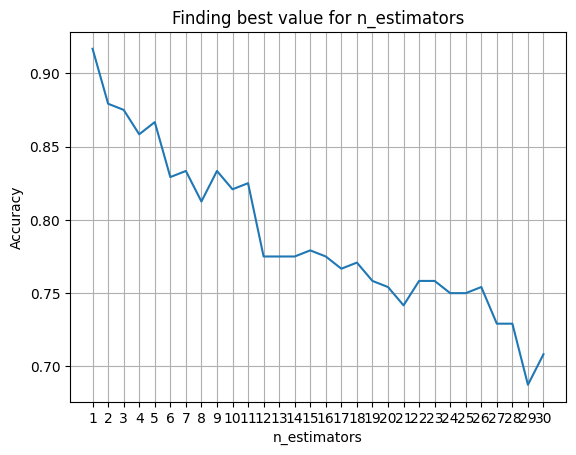

Highest value:  0.9166666666666666


In [39]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    
    acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, y_test))])
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter ranges
n_neighbors_range = range(5, 31)
metric_options = ['euclidean', 'manhattan']
weights_options = ['uniform', 'distance', 'inverse_distance']

# Create parameter grid
param_grid = dict(n_neighbors=n_neighbors_range, metric=metric_options, weights=weights_options)

# Create KNN model and grid search object
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Get best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best parameters:', best_params)
# print('Best accuracy:', best_accuracy)

C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
260 fits failed out of a total of 780.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
260 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311

Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [83]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='distance')

In [84]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [85]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [86]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [88]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [89]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 76.66666666666667
K Nearest neighbors: 92.08333333333333
Support Vector Classifier: 79.58333333333333
Naive Bayes: 66.66666666666666
Decision tree: 93.33333333333333
Random Forest: 93.33333333333333


In [47]:
ls = [accuracy_logreg, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dectree, accuracy_ranfor]
ls_model = [logreg, knn, svc, nb, dectree, ranfor]

BestFitIndex = ls.index(max(ls))
BestFitModelName = ls_model[BestFitIndex]
BestFitModelName

DecisionTreeClassifier(random_state=42)

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = BestFitModelName.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[56,  0,  0,  0],
       [ 0, 59,  3,  0],
       [ 0,  0, 52, 10],
       [ 0,  0,  3, 57]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

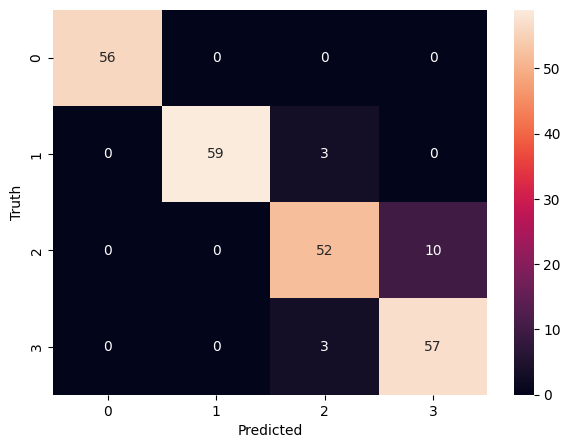

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        56
           2       1.00      0.95      0.98        62
           3       0.90      0.84      0.87        62
           4       0.85      0.95      0.90        60

    accuracy                           0.93       240
   macro avg       0.94      0.94      0.93       240
weighted avg       0.94      0.93      0.93       240



In [51]:
#Creating a pickle file for making an API

pickle_out = open("Prostate_Cancer.pkl","wb")
pickle.dump(BestFitModelName, pickle_out)
pickle_out.close()

In [52]:
X.columns

Index(['stay_up_late', 'pressure_level', 'coffee_consumed',
       'brain_working_duration', 'stress_level', 'shampoo_brand', 'swimming',
       'hair_washing', 'hair_grease', 'dandruff', 'libido'],
      dtype='object')

In [53]:
y

257    1
289    1
151    1
241    1
25     1
      ..
211    4
108    4
111    4
107    4
111    4
Name: hair_loss, Length: 800, dtype: int64